<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/Microcontroller-Detection-with-Detectron2/blob/master/Detectron2_Detect_Microcontrollers.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/Microcontroller-Detection-with-Detectron2/blob/master/Detectron2_Detect_Microcontrollers.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

## Install detectron2

> **Important**: If you're running on a local machine, be sure to follow the [installation instructions](https://github.com/facebookresearch/detectron2/blob/master/INSTALL.md). This notebook includes only what's necessary to run in Colab.

In [ ]:
# install dependencies: (use cu100 because colab is on CUDA 10.0)
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9MB 24kB/s 
     |████████████████████████████████| 4.1MB 11.7MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
     |████████████████████████████████| 276kB 9.3MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44075 sha256=734e104ffffbba8867b53a3e592947a46ce682798f6ba24a161b0effa7950fc5
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-b

In [ ]:
# install detectron2:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html
     |████████████████████████████████| 6.7MB 5.9MB/s 
     |████████████████████████████████| 2.2MB 15.1MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2.post20201122-cp36-none-any.whl size=44456 sha256=9035ab1836829ee3b2cf16e66701d9bfb2c86bc3e8d7bd6b69a13d6dc7ba8ed4
  Stored in directory: /root/.cache/pip/wheels/33/7b/ec/59dffd0a0aa995739aad60ac97e70252247e9d17eae69c1cee
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp36-cp36m-linux_x86_64.whl size=266514 sha256=68e39d7efda20e8bbb37938ad4ba2e92f3a61118963ba4aac551c795442d9a13
  Stored in directory: /root/.cache/pip/wheels/68/a5/e7/56401832f23d0b2db351c5b682e466cb4841960b086da65e4e
Successfully built fvcore pycocotools
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully unin

## Get data

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

Before we can start training our model we need to download our data-set. In this case we will use my microcontroller detection data-set, which is [available on Kaggle](https://www.kaggle.com/tannergi/microcontroller-detection).

If you are working in Colab you need to add the username and key contained in your kaggle.json file to your environment using os.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Colab Notebooks'
' color detection using opencv.zip'
 custom
 custom1.zip
 custom.zip
 darknet.zip
 dataset_plant_segmentation.zip
 FractalNet_plant_epoch_temp_500_batch_64.hdf5
 fruit_color_detection.zip
'My Drive'
'shape detection using detectron2.zip'
'Tomato and lettuce.zip'
 yolov4
 YOLOv4.ipynb
 YOLOv_detect_Tutorial_measure_map.ipynb
 YOLOv_detect_Video.ipynb


In [ ]:
!cp /mydrive/custom.zip ./   ### zip of ypur dataset
!unzip custom.zip
!ls

Archive:  custom.zip
   creating: custom/
   creating: custom/test/
  inflating: custom/test/frame2.jpg  
  inflating: custom/test/frame2.xml  
  inflating: custom/test/frame265.jpg  
  inflating: custom/test/frame265.xml  
  inflating: custom/test/frame266.jpg  
  inflating: custom/test/frame266.xml  
  inflating: custom/test/frame267.jpg  
  inflating: custom/test/frame267.xml  
  inflating: custom/test/frame268.jpg  
  inflating: custom/test/frame268.xml  
  inflating: custom/test/frame269.jpg  
  inflating: custom/test/frame269.xml  
  inflating: custom/test/frame3.jpg  
  inflating: custom/test/frame3.xml  
  inflating: custom/test/frame344.jpg  
  inflating: custom/test/frame344.xml  
  inflating: custom/test/frame353.jpg  
  inflating: custom/test/frame353.xml  
  inflating: custom/test/frame395.jpg  
  inflating: custom/test/frame395.xml  
  inflating: custom/test/frame396.jpg  
  inflating: custom/test/frame396.xml  
  inflating: custom/test/frame397.jpg  
  inflating: custom/

In [ ]:
import pandas as pd

df = pd.read_csv('custom/train_labels.csv')

df.head()

filename  width  height          class  xmin  ymin  xmax  ymax
0   frame0.jpg    960     540  galbo (halal)   316   329   477   460
1   frame0.jpg    960     540  galbo (halal)   503   329   688   472
2   frame0.jpg    960     540  galbo (halal)   700   345   888   506
3  frame83.jpg    960     540  galbo (halal)   135   121   291   239
4  frame83.jpg    960     540  galbo (halal)   302   123   460   232

## Register data-set

In order to use a dataset with Detectron2 we need to register it. For more information check out the [official documentation](https://detectron2.readthedocs.io/tutorials/datasets.html#register-a-dataset).

In [ ]:
import os
import numpy as np
import json
from detectron2.structures import BoxMode
import itertools
import cv2

# write a function that loads the dataset into detectron2's standard format
def get_microcontroller_dicts(csv_file, img_dir):
    df = pd.read_csv(csv_file)
    df['filename'] = df['filename'].map(lambda x: img_dir+x)

    classes = ["galbo (halal)","kitkat (halal)","snickers (halal)"]

    df['class_int'] = df['class'].map(lambda x: classes.index(x))

    dataset_dicts = []
    for filename in df['filename'].unique().tolist():
        record = {}
        
        height, width = cv2.imread(filename).shape[:2]
        
        record["file_name"] = filename
        record["height"] = height
        record["width"] = width

        objs = []
        for index, row in df[(df['filename']==filename)].iterrows():
          obj= {
              'bbox': [row['xmin'], row['ymin'], row['xmax'], row['ymax']],
              'bbox_mode': BoxMode.XYXY_ABS,
              'category_id': row['class_int'],
              "iscrowd": 0
          }
          objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog

classes = ["galbo (halal)","kitkat (halal)","snickers (halal)"]

for d in ["train", "test"]:
  DatasetCatalog.register('custom/' + d, lambda d=d: get_microcontroller_dicts('custom/' + d + '_labels.csv', 'custom/' + d+'/'))
  MetadataCatalog.get('custom/' + d).set(thing_classes=classes)
microcontroller_metadata = MetadataCatalog.get('custom/train')

We can check if our code works correctly by plotting a few images.

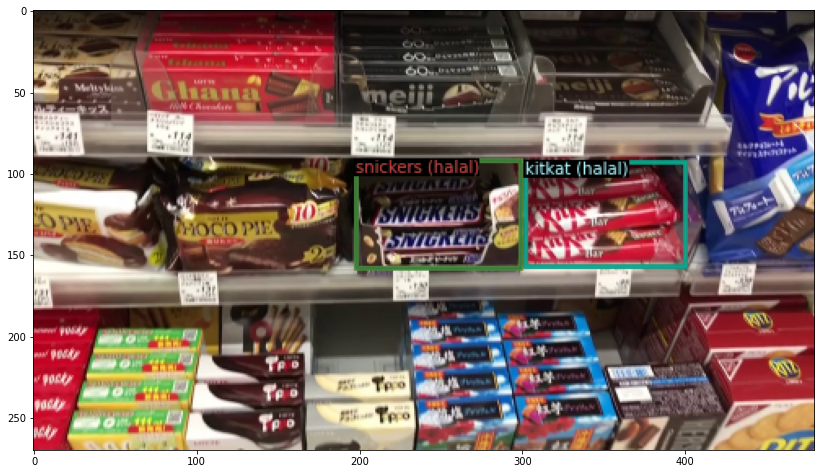

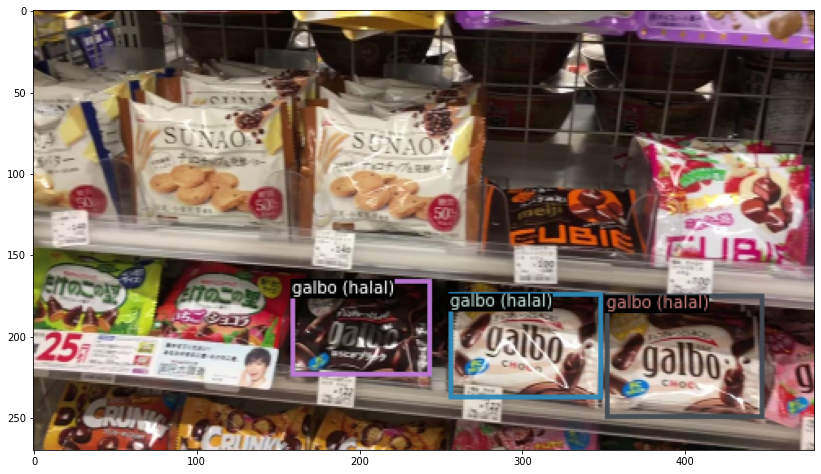

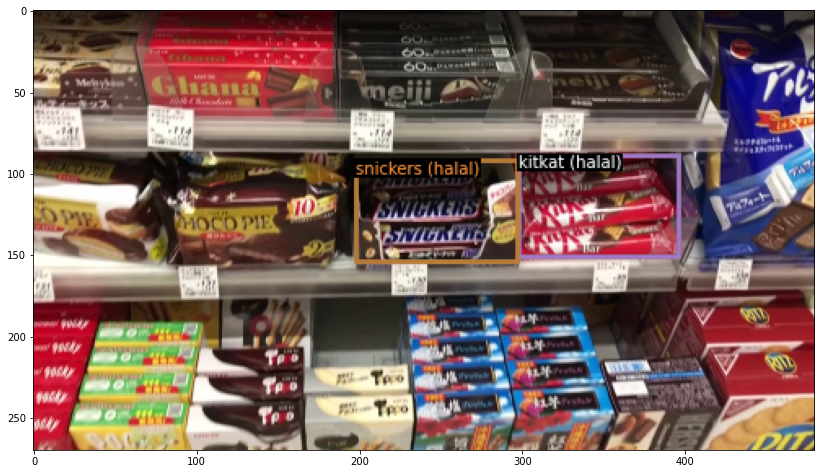

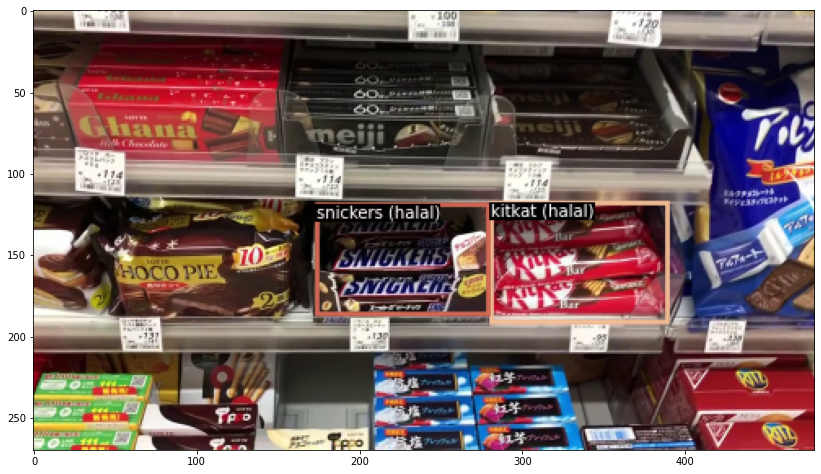

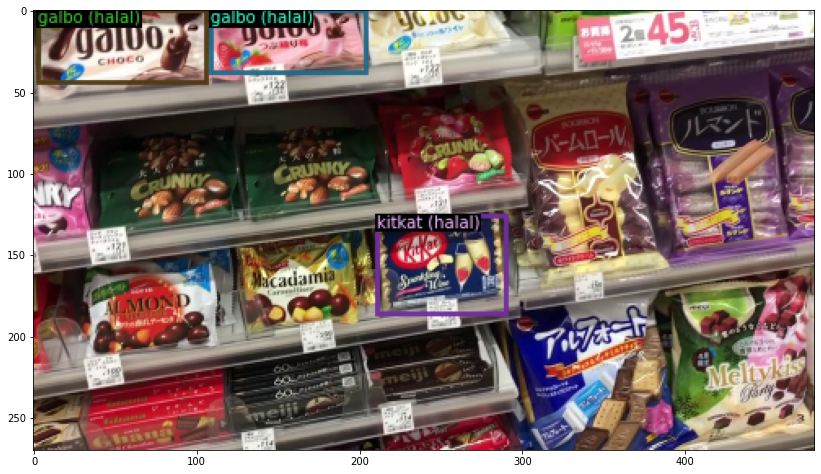

In [ ]:
import random
from detectron2.utils.visualizer import Visualizer

dataset_dicts = DatasetCatalog.get('custom/train')
for d in random.sample(dataset_dicts, 5):
    img = cv2.imread(d["file_name"])
    v = Visualizer(img[:, :, ::-1], metadata=microcontroller_metadata, scale=0.5)
    v = v.draw_dataset_dict(d)
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

## Train model

Now, let's fine-tune a pretrained FasterRCNN object detection model to detect the different microcontrollers.

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ('custom/train',)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[11/25 05:18:31 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (12, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (12,) in the model! You might want to double check if this is expected.


[11/25 05:18:33 d2.engine.train_loop]: Starting training from iteration 0
[11/25 05:18:48 d2.utils.events]:  eta: 0:12:04  iter: 19  total_loss: 1.063  loss_cls: 0.900  loss_box_reg: 0.119  loss_rpn_cls: 0.045  loss_rpn_loc: 0.014  time: 0.7277  data_time: 0.0166  lr: 0.000400  max_mem: 3674M
[11/25 05:19:03 d2.utils.events]:  eta: 0:12:02  iter: 39  total_loss: 0.731  loss_cls: 0.374  loss_box_reg: 0.343  loss_rpn_cls: 0.016  loss_rpn_loc: 0.010  time: 0.7412  data_time: 0.0045  lr: 0.000799  max_mem: 3674M
[11/25 05:19:19 d2.utils.events]:  eta: 0:11:52  iter: 59  total_loss: 0.695  loss_cls: 0.303  loss_box_reg: 0.369  loss_rpn_cls: 0.006  loss_rpn_loc: 0.009  time: 0.7483  data_time: 0.0048  lr: 0.001199  max_mem: 3674M
[11/25 05:19:34 d2.utils.events]:  eta: 0:11:48  iter: 79  total_loss: 0.633  loss_cls: 0.232  loss_box_reg: 0.391  loss_rpn_cls: 0.001  loss_rpn_loc: 0.008  time: 0.7598  data_time: 0.0056  lr: 0.001598  max_mem: 3674M
[11/25 05:19:50 d2.utils.events]:  eta: 0:11:3

## Use model for inference

Now, we can perform inference on our validation set by creating a predictor object.

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8   # set the testing threshold for this model
cfg.DATASETS.TEST = ('custom/test', )
predictor = DefaultPredictor(cfg)

In [ ]:
df_test = pd.read_csv('custom/test_labels.csv')
df_test

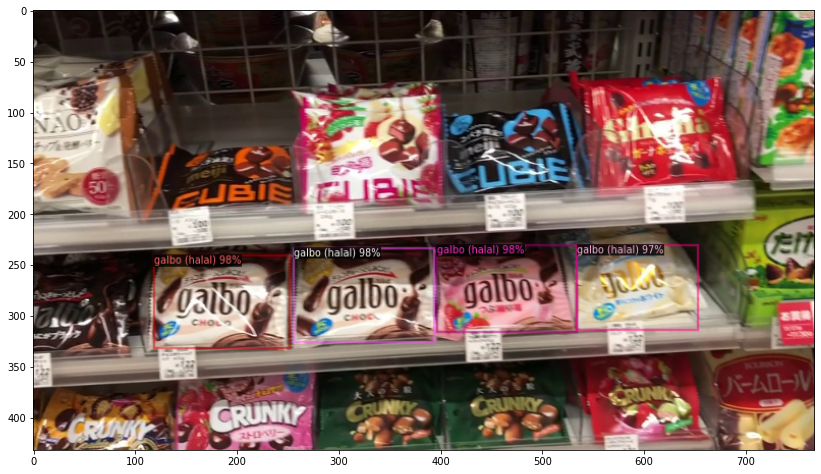

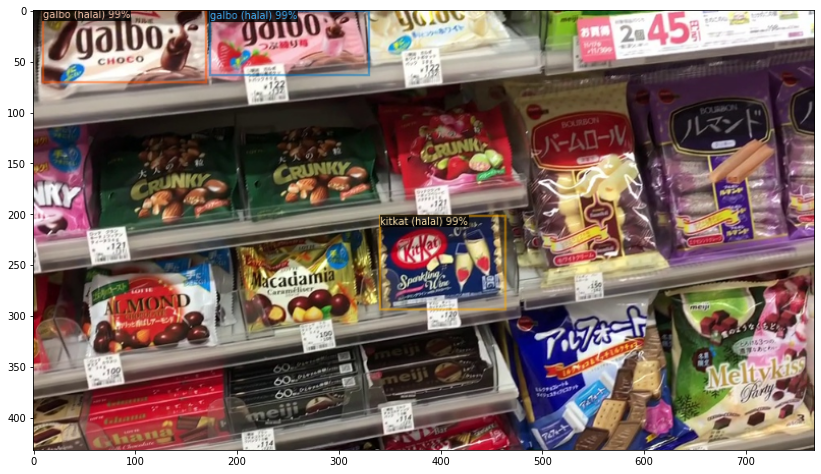

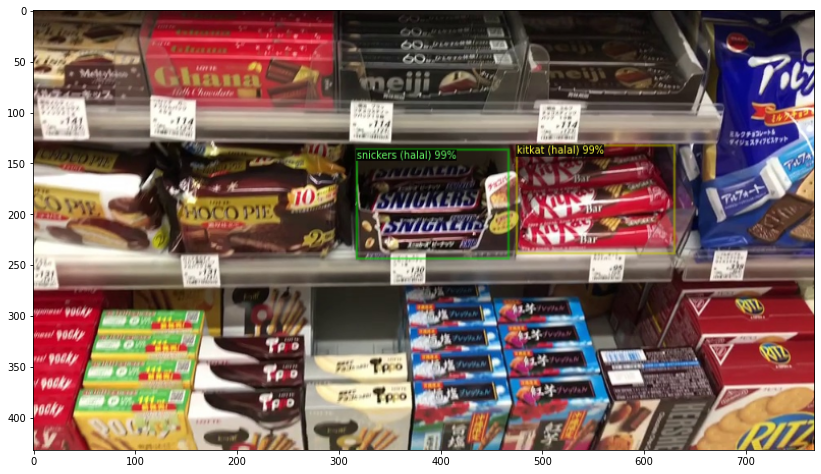

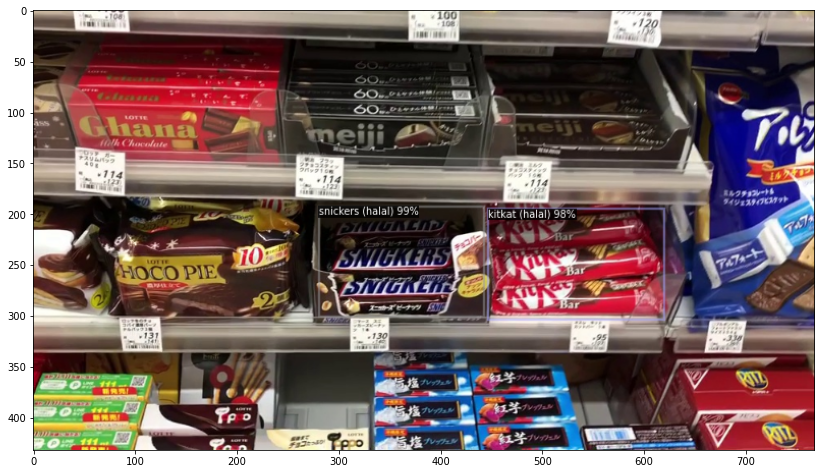

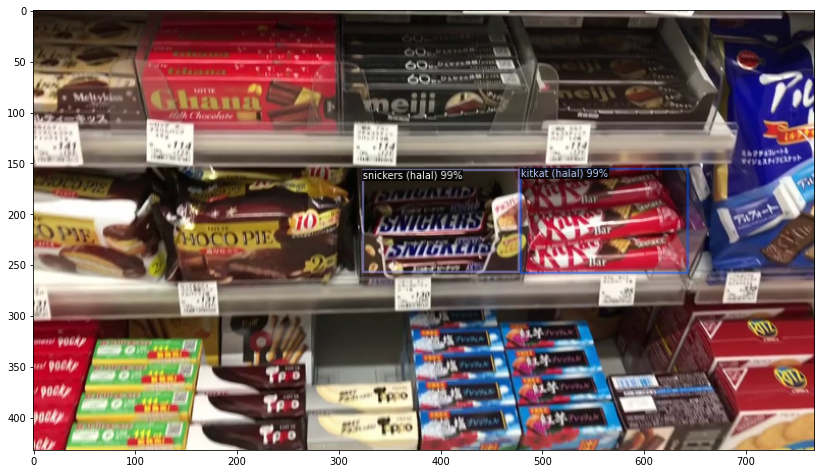

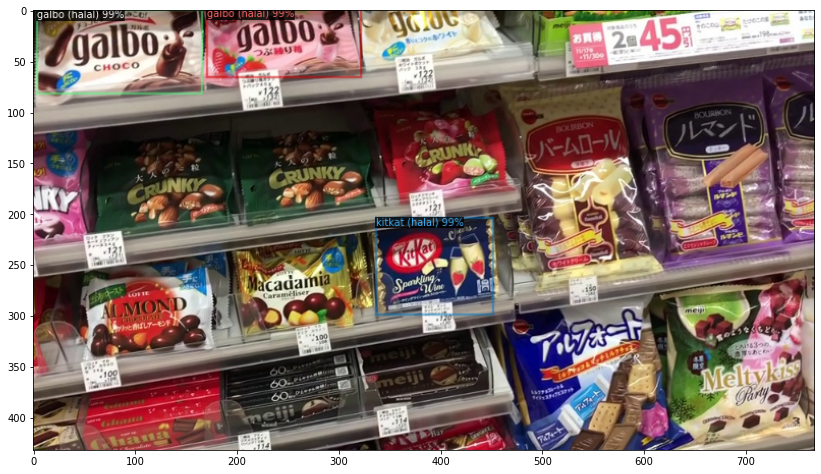

In [ ]:
from detectron2.utils.visualizer import ColorMode
import random

dataset_dicts = DatasetCatalog.get('custom/test')
for d in random.sample(dataset_dicts, 6):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], metadata=microcontroller_metadata, scale=0.8)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

<IPython.core.display.Javascript object>

In [ ]:
# Some basic setup: to detect video or images
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

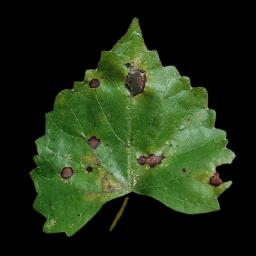

In [ ]:
#!cp /mydrive/Normal_341.jpg ./
im = cv2.imread("./frame5.jpg")
cv2_imshow(im)

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8   # set the testing threshold for this model
cfg.DATASETS.TEST = ('custom/test')
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

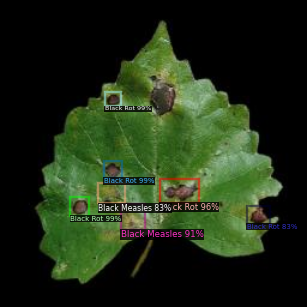

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
!mkdir outputImages
import cv2

vidcap = cv2.VideoCapture("1.mov")
success,im = vidcap.read()

n = 1

while success:

  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

  
  fileDir = 'outputImages/'+str(n)+'.jpg'
  cv2.imwrite(fileDir, out.get_image()[:, :, ::-1]) 

  n += 1
  print("Frame "+str(n)+" completed")
  success,im = vidcap.read()

import cv2
import imageio
import numpy as np

print("Total frames: "+str(n))

with imageio.get_writer("out2.mov", mode = 'I') as writer:
  for i in range(1,n):
    frame = cv2.imread('outputImages/'+str(i)+'.jpg')
    frame = frame[:, :, [2, 1, 0]]
    writer.append_data(frame)
    print("Frame "+str(i)+" completed")  

mkdir: cannot create directory ‘outputImages’: File exists
Frame 2 completed
Frame 3 completed
Frame 4 completed
Frame 5 completed
Frame 6 completed
Frame 7 completed
Frame 8 completed
Frame 9 completed
Frame 10 completed
Frame 11 completed
Frame 12 completed
Frame 13 completed
Frame 14 completed
Frame 15 completed
Frame 16 completed
Frame 17 completed
Frame 18 completed
Frame 19 completed
Frame 20 completed
Frame 21 completed
Frame 22 completed
Frame 23 completed
Frame 24 completed
Frame 25 completed
Frame 26 completed
Frame 27 completed
Frame 28 completed
Frame 29 completed
Frame 30 completed
Frame 31 completed
Frame 32 completed
Frame 33 completed
Frame 34 completed
Frame 35 completed
Frame 36 completed
Frame 37 completed
Frame 38 completed
Frame 39 completed
Frame 40 completed
Frame 41 completed
Frame 42 completed
Frame 43 completed
Frame 44 completed
Frame 45 completed
Frame 46 completed
Frame 47 completed
Frame 48 completed
Frame 49 completed
Frame 50 completed
Frame 51 completed